In [81]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
dbname = "dtek2.db"

Text(0.5, 1.0, 'Message distribution')

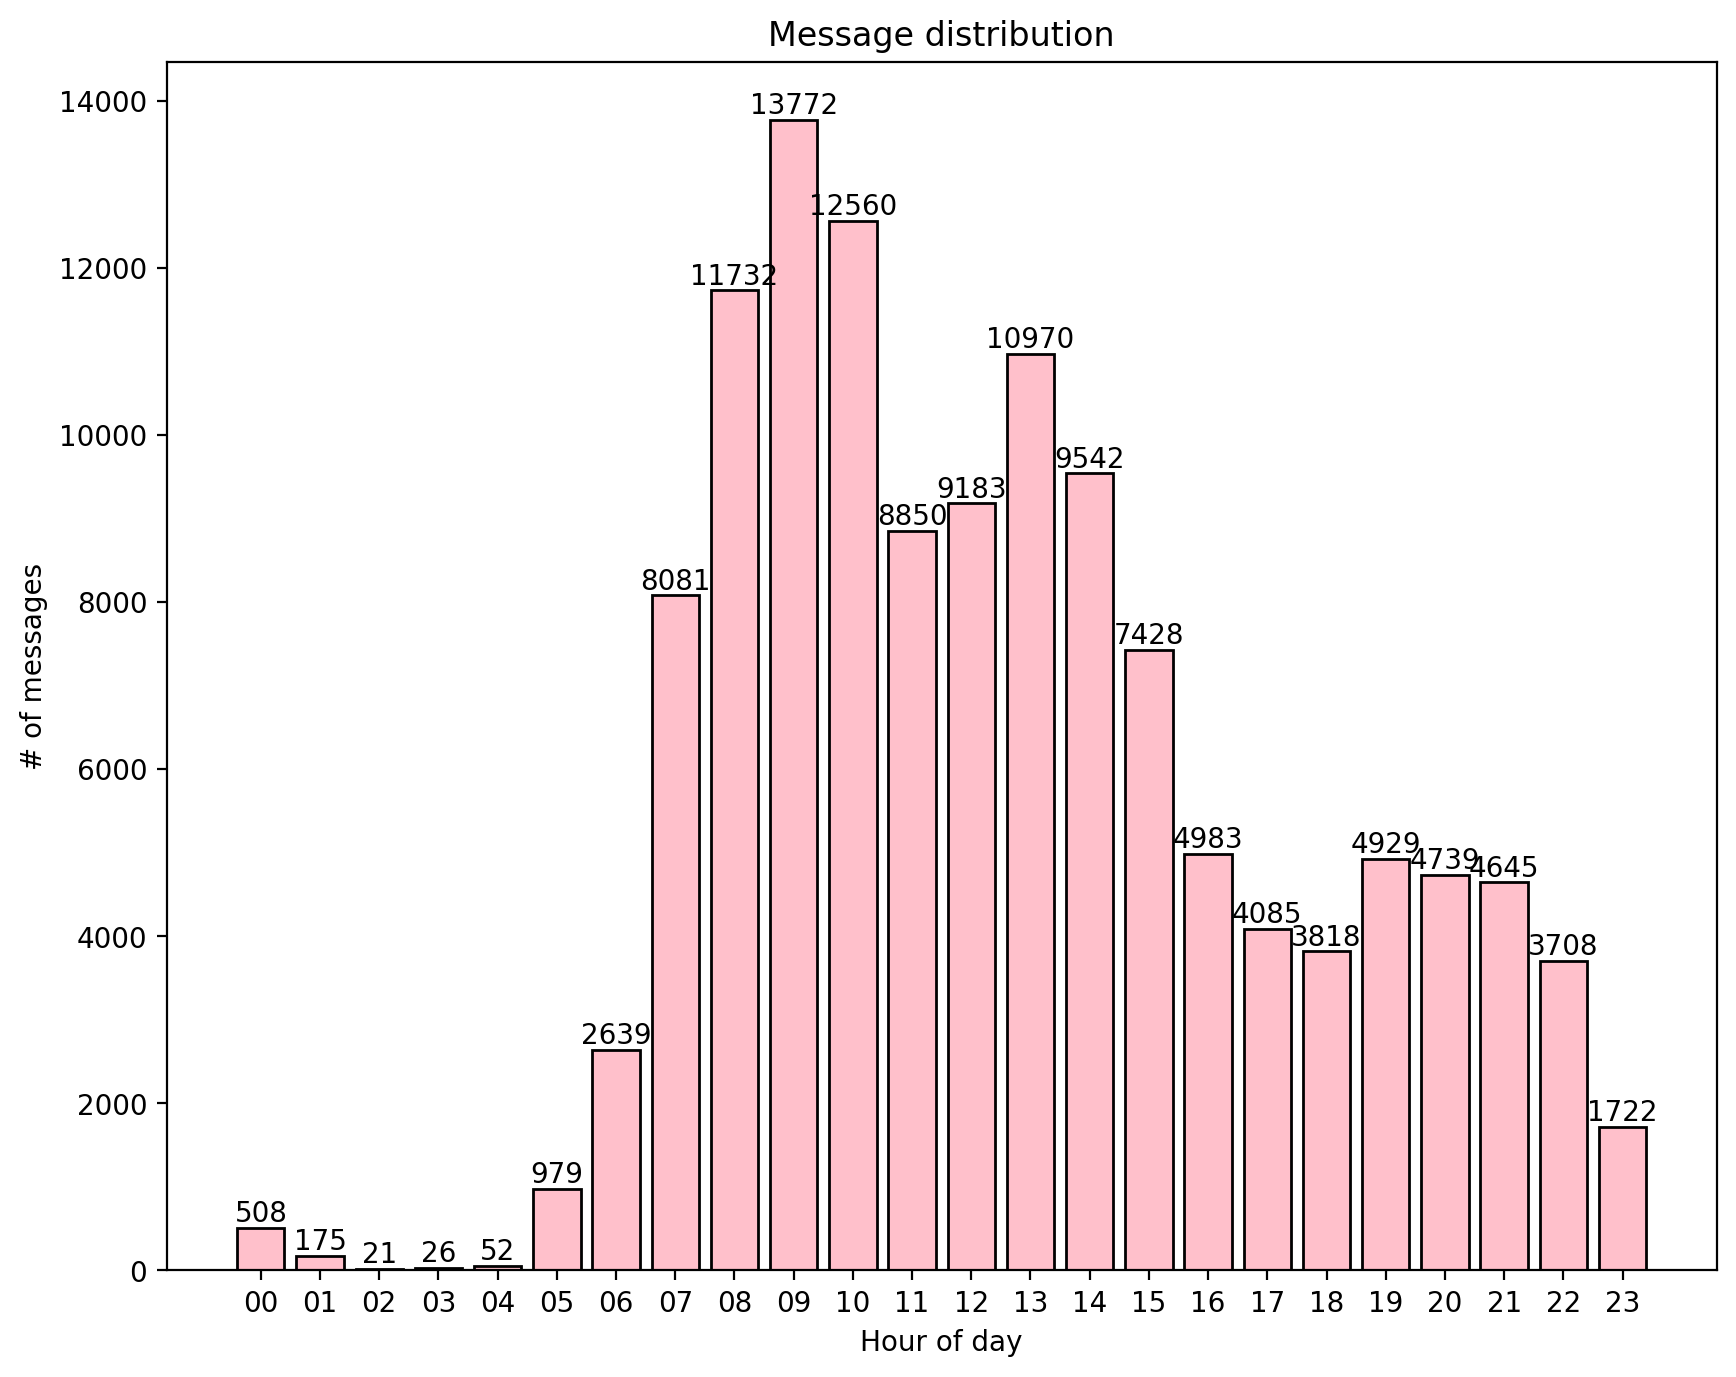

In [82]:
con = sqlite3.connect(dbname)
df = pd.read_sql_query("""
select tod, count(rowid) as count
from
    (select substr(time, 0, 3) as tod, rowid from logs)
group by tod
""", con)

fig = plt.figure(figsize=(10, 8), dpi=200)
ax = fig.add_subplot(111)

bar = ax.bar(df['tod'], height=df['count'], color='pink', edgecolor='black')

ax.bar_label(bar)
ax.set_xlabel('Hour of day')
ax.set_ylabel('# of messages')
ax.set_title('Message distribution')

Text(0.5, 1.0, 'Messages per week 2022')

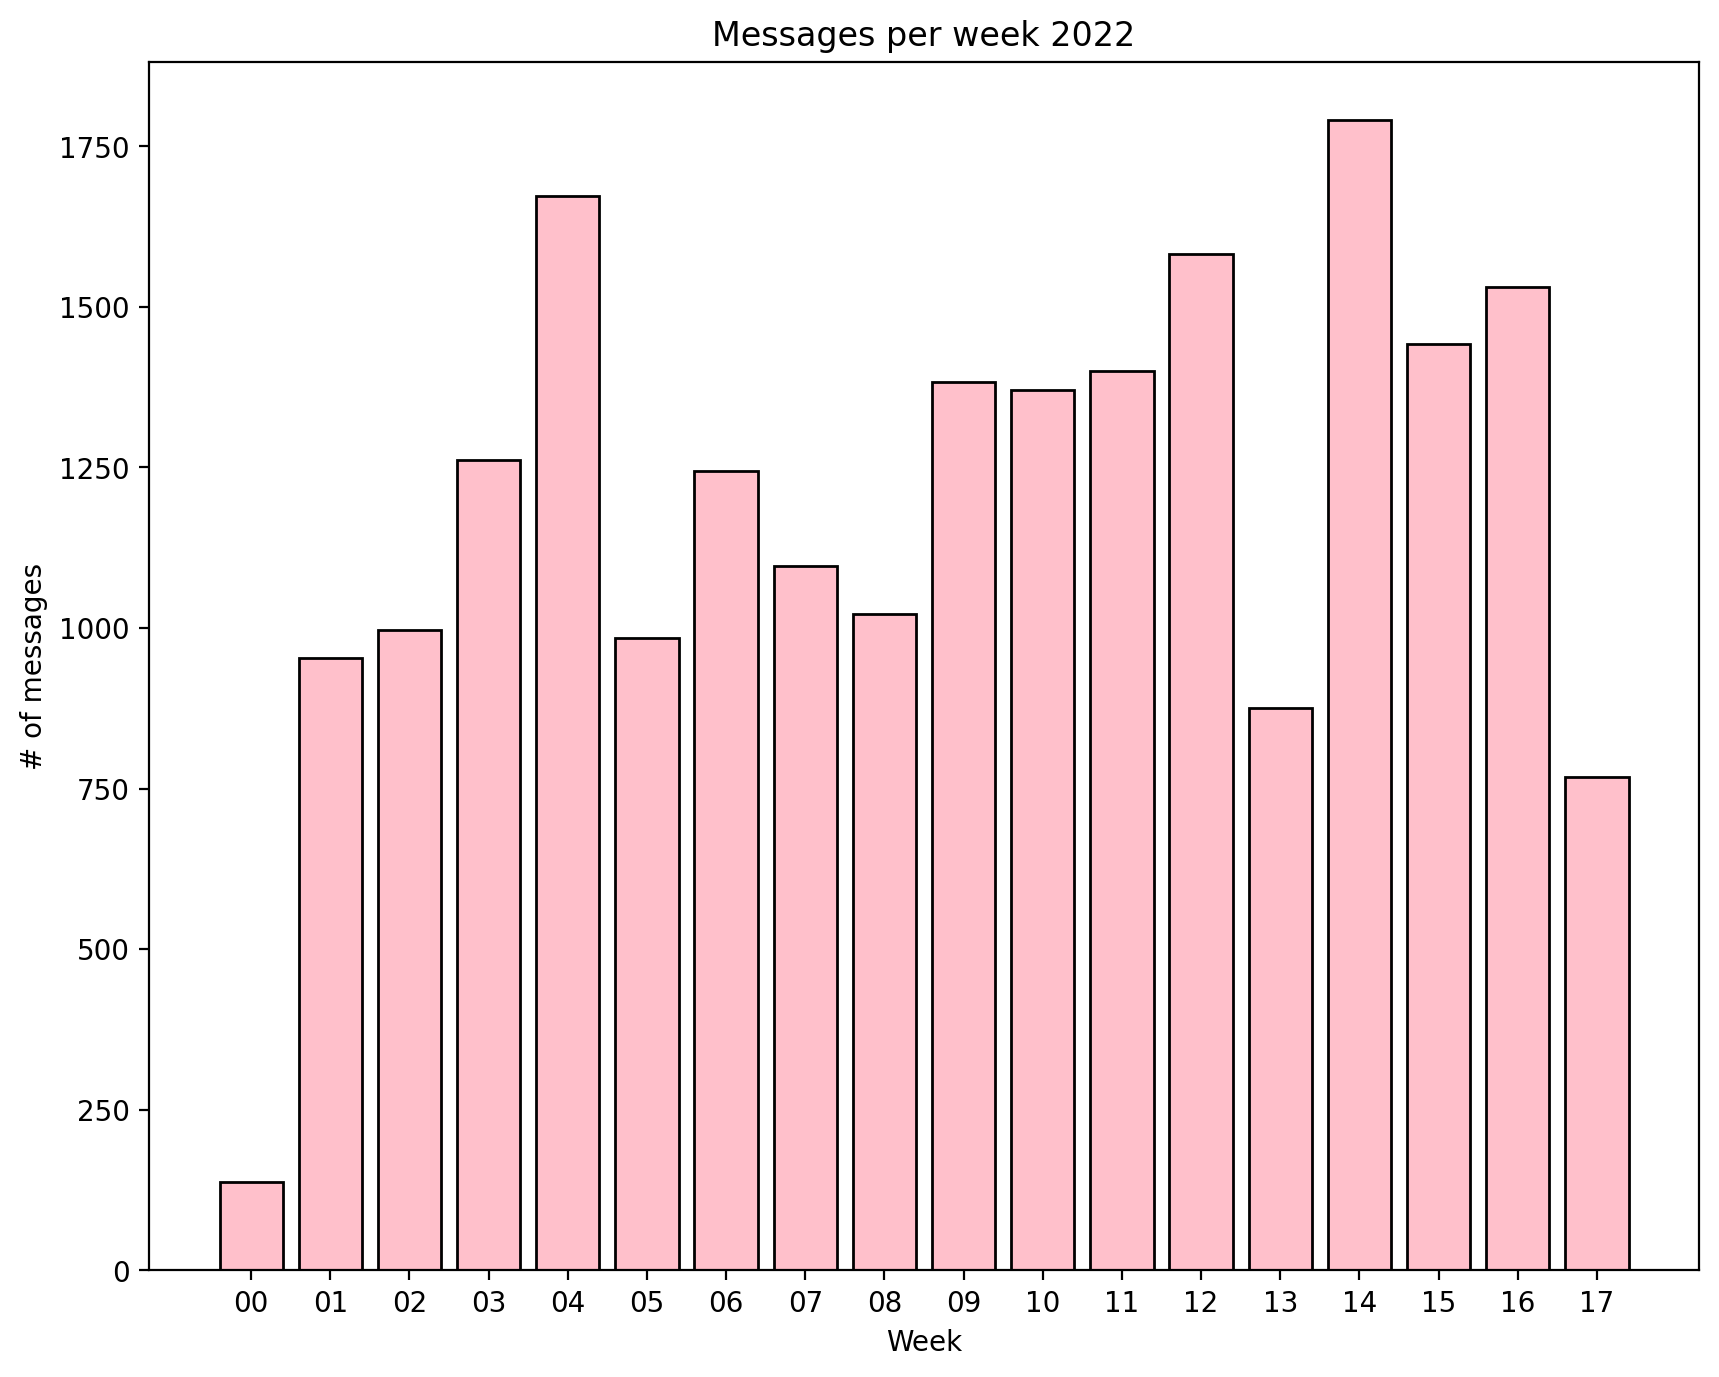

In [83]:
con = sqlite3.connect(dbname)
df = pd.read_sql_query("""
select week, count(rowid) as count
from
    (select strftime("%W", date) as week, rowid 
    from logs
    where strftime("%Y", date) == "2022")
group by week
""", con)

fig = plt.figure(figsize=(10, 8), dpi=200)
ax = fig.add_subplot(111)

bar = ax.bar(df['week'], height=df['count'], color='pink', edgecolor='black')

ax.set_xlabel('Week')
ax.set_ylabel('# of messages')
ax.set_title('Messages per week 2022')